## Task 3: Neural Networks with TensorFlow/Keras


- Description: Build and train a simple feed-forward
neural network to classify images or structured data.


- Load a dataset (e.g., MNIST digits or a structured
dataset) and preprocess it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras


In [2]:
# importing the MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

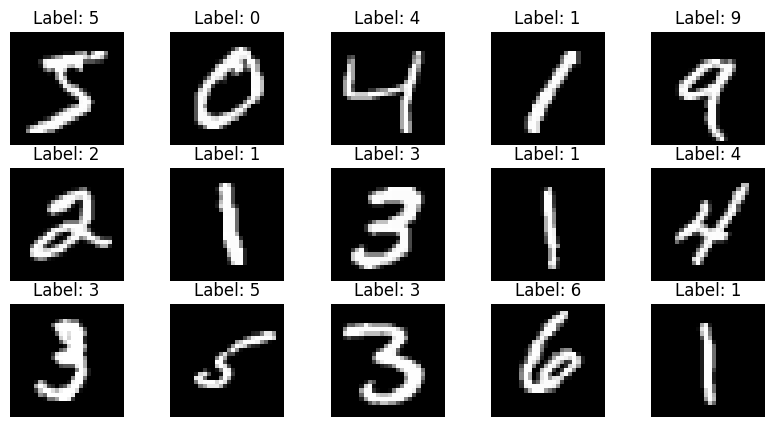

In [3]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

In [3]:
# Y dataset preprocessing
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [4]:
y_test = to_categorical(y_test, num_classes=10)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# X dataset preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- Design a neural network architecture using TensorFlow
or Keras.


In [7]:
model = Sequential([
    keras.Input(shape=(28, 28, 1)),  # Input shape for grayscale images
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

- Train the model using backpropagation and evaluate it
using accuracy and loss curves.


In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8503 - loss: 0.4967 - val_accuracy: 0.9797 - val_loss: 0.0712
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9808 - loss: 0.0610 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 0.9870 - val_loss: 0.0445
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9887 - val_loss: 0.0404


In [9]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


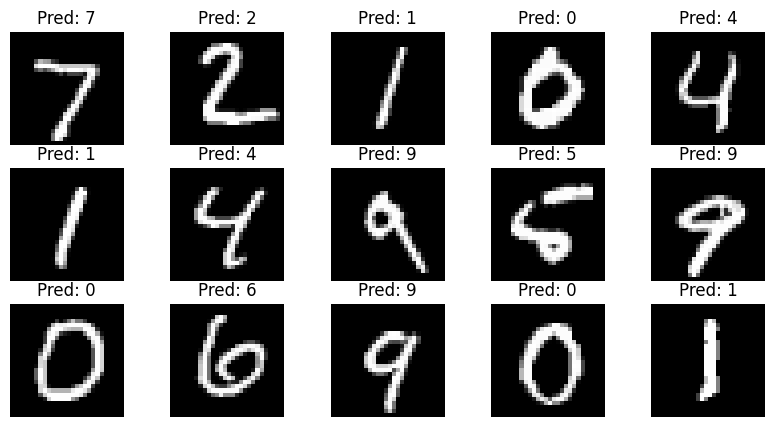

In [10]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis('off')

- Train the model using backpropagation and evaluate it
using accuracy and loss curves.

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9882 - loss: 0.0386
Test Accuracy: 0.9905, Test Loss: 0.0310


In [ ]:
# make the training loss history
epochs = 5
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9883 - val_loss: 0.0439
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9884 - val_loss: 0.0422
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9878 - val_loss: 0.0449
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9882 - val_loss: 0.0449
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9903 - val_loss: 0.0420


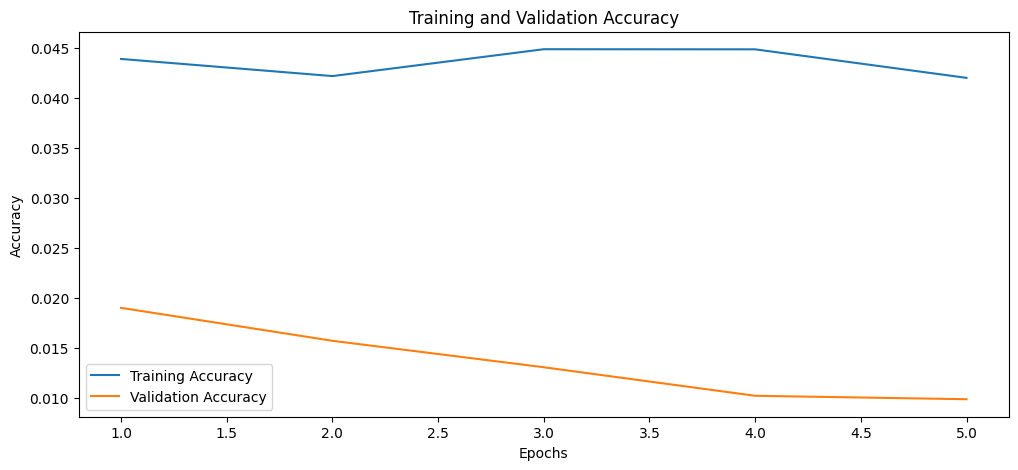

In [16]:
accuracy_history = history.history['accuracy']
loss_history = history.history['loss']
val_accuracy_history = history.history['val_accuracy']
val_loss_history = history.history['val_loss']
plt.figure(figsize=(12, 5))
epochs = 5
epochs_range = range(1, epochs + 1)
sns.lineplot(x=epochs_range, y=val_loss_history, label='Training Accuracy')
sns.lineplot(x=epochs_range, y=loss_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

It is shown from the picture that our loss is gradualy falling.

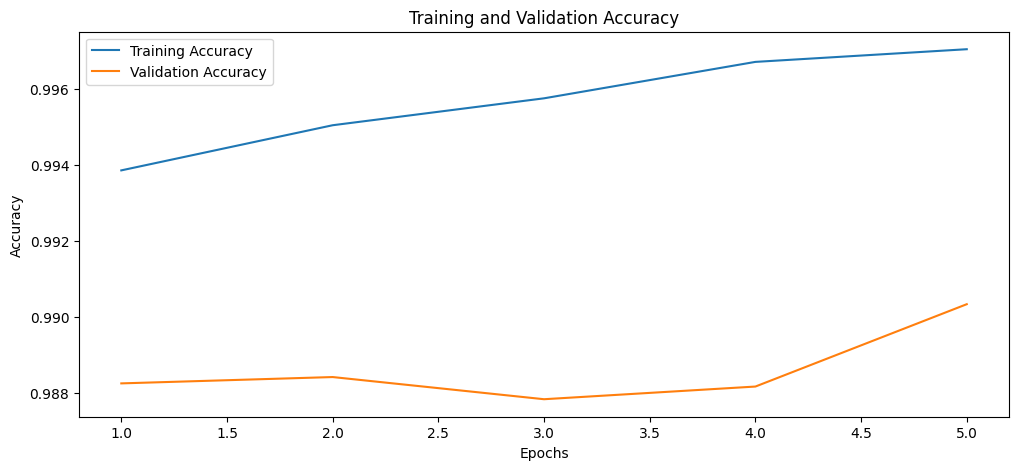

In [17]:
plt.figure(figsize=(12, 5))
epochs = 5
epochs_range = range(1, epochs + 1)
sns.lineplot(x=epochs_range, y=accuracy_history, label='Training Accuracy')
sns.lineplot(x=epochs_range, y=val_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

Our accuracy of model is increasing as well as epochs it is a good sign.

- Tune hyperparameters (e.g., learning rate, batch size) to
improve performance.


These are our hyperparameters which we normally tunned.
        
        - learning_rate
        
        - epochs
        
        - optimizer
        
        - batch_size

Important:

    We can use keras-tuner for smartly find the best hyperparameters for our model. But due to the machine low specifications it may be not easily possible. so we will go manually adjust hyperparameters.

In [19]:
# taking learning rate 0.001, batch size 64, epochs 5
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9898 - val_loss: 0.0441
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9880 - val_loss: 0.0543
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9872 - val_loss: 0.0564
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9901 - val_loss: 0.0488
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9883 - val_loss: 0.0539
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9862 - loss: 0.0583
Test Accuracy: 0.9888, Test Loss: 0.0487


In [20]:

# taking learning rate 0.0001, batch size 32, epochs 10
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9915 - val_loss: 0.0457
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 1.0000 - loss: 3.2562e-04 - val_accuracy: 0.9913 - val_loss: 0.0463
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 1.0000 - loss: 1.5955e-04 - val_accuracy: 0.9919 - val_loss: 0.0481
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 1.0000 - loss: 9.0137e-05 - val_accuracy: 0.9915 - val_loss: 0.0497
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 1.0000 - loss: 6.2948e-05 - val_accuracy: 0.9918 - val_loss: 0.0553
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 1.0000 - loss: 6.8114e-05 - val_accuracy: 0.9918 - val_loss: 0.0567
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 1.0000 - loss: 1.9469e-05 - val_accuracy: 0.9922 - val_loss: 0.0584
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/s

In [21]:
# taking learning rate 0.003, batch size 128, epochs 3
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9962 - loss: 0.0148 - val_accuracy: 0.9875 - val_loss: 0.0705
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9860 - val_loss: 0.0690
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9958 - loss: 0.0116 - val_accuracy: 0.9862 - val_loss: 0.0587
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9850 - loss: 0.0594
Test Accuracy: 0.9887, Test Loss: 0.0459


It is shown that the accuracy and loss is effected by the tunning of hyperparameters tunning.


- Tools: Python, TensorFlow, Keras, pandas, matplotlib.
